In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_excel("Mall Customers.xlsx")

In [4]:
df

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [10]:
x=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [11]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
model = KMeans(n_clusters=5, random_state=42)

In [14]:
model.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [15]:
labels= model.labels_
df["Clusters"] = labels
labels = df["Clusters"]

In [16]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Clusters
0,1,M,19,High School,Married,15,39,2
1,2,M,21,Graduate,Single,15,81,2
2,3,F,20,Graduate,Married,16,6,3
3,4,F,23,High School,Unknown,16,77,2
4,5,F,31,Uneducated,Married,17,40,2


In [17]:
df["Clusters"].unique()

array([2, 3, 0, 1, 4], dtype=int32)

In [18]:
groups= df.groupby('Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
groups

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,55.3,47.6,41.7
1,32.7,86.5,82.1
2,25.5,25.5,75.4
3,27.1,54.4,41.7
4,44.4,89.8,18.5


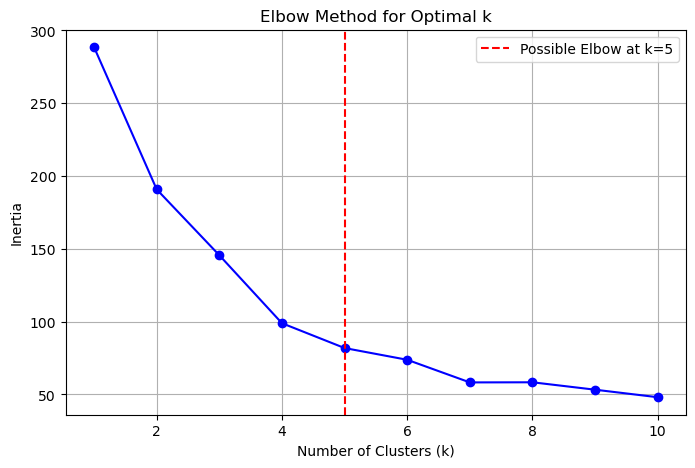

In [22]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='Possible Elbow at k=5')
plt.legend()
plt.show()


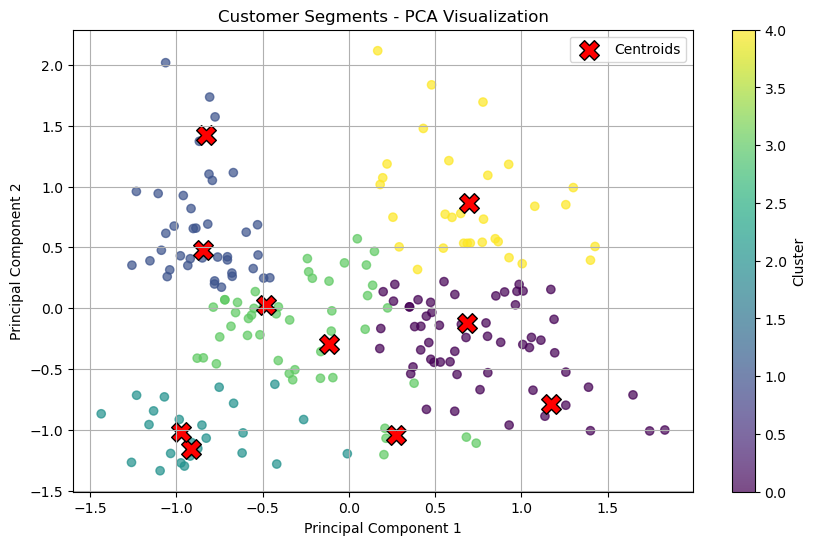

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# visualizing
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='X', s=200, color='red', edgecolors='black', label='Centroids')

# Add labels and save
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.savefig('cluster_pca_visualization.png')
plt.show()

In [21]:
groups= df.groupby('Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
groups

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,55.3,47.6,41.7
1,32.7,86.5,82.1
2,25.5,25.5,75.4
3,27.1,54.4,41.7
4,44.4,89.8,18.5


# Description:
After applying K-Means clustering (k = 5) on scaled features (Annual Income, Spending Score, and Age)  we obtained five distinct customer groups. Below is the detailed description and behavioral insight for each cluster:

# Cluster 0 - "Mature Budget-Conscious Customers"
Average Age: ~55 years

Annual Income: ~47k

Spending Score: ~42

# Insight:
This cluster mostly consists of older customers who have a moderate income and show balanced to low spending behavior. They likely prefer essential and practical purchases, making them a stable but conservative customer base.

# Cluster 1 - "High-Income Luxury Shoppers"
Average Age: ~33 years

Annual Income: ~87k

Spending Score: ~82

# Insight:
These customers are young, well-earning professionals or business individuals who frequently spend on premium products and services. They represent high-value customers and are ideal for marketing luxury or high-end offerings.

# Cluster 2 – "Young Impulsive Spenders"
Average Age: ~25 years

Annual Income: ~25k

Spending Score: ~75

# Insight:
This segment includes young customers with low income but high spending tendencies. They may be students or early professionals who prioritize lifestyle and trends over budgeting. Targeting them with offers or promotions may drive sales.

# Cluster 3 – "Balanced Middle-Class Youth"
Average Age: ~27 years

Annual Income: ~54k

Spending Score: ~42

# Insight:
These customers maintain a balance between income and spending. They likely represent the salaried middle class who prefer value-for-money purchases. They respond well to loyalty programs and budget-friendly deals.

# Cluster 4 – "Wealthy but Frugal Customers/ Budget-Concious Customers"
Average Age: ~44 years

Annual Income: ~90k

Spending Score: ~18

# Insight:
Despite having the highest income, this group spends the least. They could be financially conservative individuals, investors, or those saving for long-term goals. Gaining their trust through personalized value propositions is key.

#  Conclusion
This clustering approach helped identify five meaningful customer segments based on income, spending, and age. These insights can help the business in designing targeted marketing strategies, personalized offers, and product recommendations for each customer type.







